# 4.12.1 DSB-SC Modulation and Demodulation
<span style="color:red"> <b>*Note: See Textbook*</b></span>

In [2]:
# Save the next 3 lines to import necessary packages, such as numpy
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, filter_design as fd, lfilter

In [3]:
# Save this code as triplesinc.py
# Generating a baseband signal for modulation
# Usage: m = triplesinc(t, Ta)
def triplesinc(t, Ta):
    # t is the length of the signal
    # Ta is the parameter, equaling twice the delay
    sig_1 = np.sinc(2 * t / Ta)
    sig_2 = np.sinc(2 * t / Ta - 1)
    sig_3 = np.sinc(2 * t / Ta + 1)
    m = 2 * sig_1 + sig_2 + sig_3
    return m

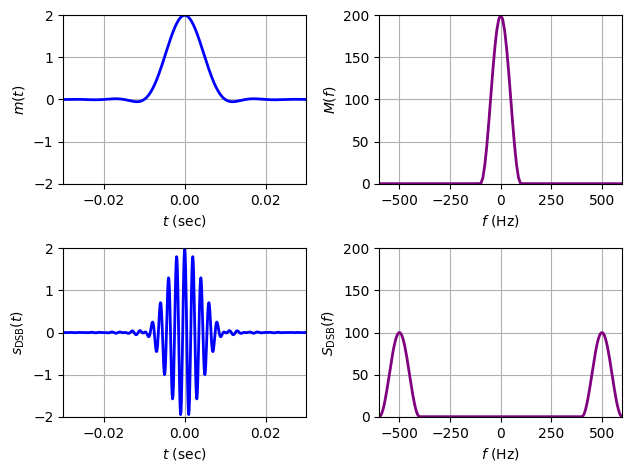

In [4]:
# Save this code as ExampleDSB.py
# This example generate DSB-SC modulated signals in t/f domains
ts = 1e-4;   t = np.arange(-0.04, 0.04 + ts, ts)
Ta = 0.01

m_sig = triplesinc(t, Ta)
Lfft = len(t)
Lfft = int(2 ** np.ceil(np.log2(Lfft)))

M_fre = np.fft.fftshift(np.fft.fft(m_sig, Lfft))
freqm = np.arange(-Lfft/2, Lfft/2, 1) / (Lfft*ts)

s_dsb = m_sig * np.cos(2*np.pi*500*t)
Lfft = int(2 ** (np.ceil(np.log2(Lfft)) + 1))

S_dsb = np.fft.fftshift(np.fft.fft(s_dsb, Lfft))
freqs = np.arange(-Lfft/2, Lfft/2, 1) / (Lfft*ts)

Trange = [-0.03, 0.03, -2, 2]
Frange = [-600, 600, 0, 200]

plt.figure(1)

td1 = plt.subplot(221); plt.grid()
td1.plot(t, m_sig,'b',linewidth=2); td1.axis(Trange)
td1.set_xlabel(r'$t$ (sec)'); td1.set_ylabel(r'${\it m}({\it t})$')

td2 = plt.subplot(223); plt.grid()
td2.plot(t, s_dsb,'b', linewidth=2); td2.axis(Trange)
td2.set_xlabel(r'$t$ (sec)'); td2.set_ylabel(r'${s}_{\rm{DSB}}({t})$')

fd1 = plt.subplot(222); plt.grid()
fd1.plot(freqm, np.abs(M_fre), 'purple', linewidth=2); fd1.axis(Frange)
fd1.set_xlabel(r'$f$ (Hz)'); fd1.set_ylabel(r'${\it M}({\it f})$')

fd2 = plt.subplot(224); plt.grid()
fd2.plot(freqs, np.abs(S_dsb),'purple', linewidth=2); fd2.axis(Frange)
fd2.set_xlabel(r'$f$ (Hz)'); fd2.set_ylabel(r'${S}_{\rm{DSB}}({f})$')

plt.tight_layout(pad=1.0) # Set the spacing between subfigures
plt.show()

<img src="images/Fig4_41.png" width="600" />

<center><b>Figure 4.41</b> Time domain signals during DSB-SC modulation and demodulation.</center>

<span style="color:red"> <b>*Note: See Textbook*</b></span>

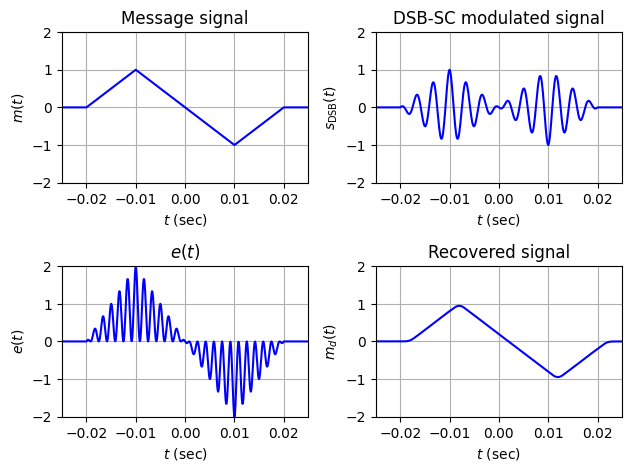

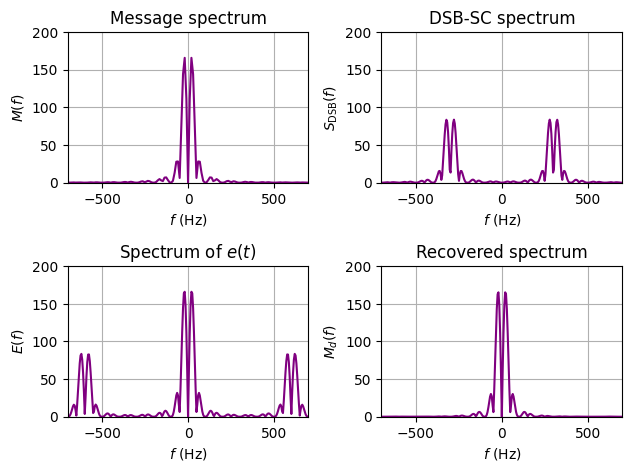

In [5]:
# Save this code as ExampleDSBdemfilt.py
# This example illustrates the effect of DSB-SC modulation and
# demodulation for triangle signal whose bandwidth is theoretically unlimited
# First redefine the triangle signal:
def triangl(t):
    return (1-np.abs(t))*(t>=-1)*(t<1)
# The code starts to modulate
ts = 1e-4; t = np.arange(-0.04, 0.04+ts, ts)
m_sig = triangl((t+0.01)/0.01)-triangl((t-0.01)/0.01)
Lm_sig = len(m_sig)
Lfft = len(t)
Lfft = int(2**np.ceil(np.log2(Lfft)))
M_fre = np.fft.fftshift(np.fft.fft(m_sig,Lfft))
freqm = np.arange(-Lfft/2, Lfft/2, 1)/(Lfft*ts)
B_m = 150 # Bandwidth of the signal is B_m Hz.
h = firwin(40,[B_m*ts],window='hamming',pass_zero='lowpass')

t = np.arange(-0.04, 0.04+ts, ts); Ta = 0.01
fc = 300 # carrier frequency
s_dsb = m_sig*np.cos(2*np.pi*fc*t)   # DSB-SC modulation
Lfft = len(t)
Lfft = int(2**np.ceil(np.log2(Lfft)+1))
S_dsb = np.fft.fftshift(np.fft.fft(s_dsb,Lfft))  # frequency domain
freqs = np.arange(-Lfft/2, Lfft/2, 1)/(Lfft*ts)

# 1st demodulation step by multiplying with the carrier
s_dem = s_dsb*np.cos(2*np.pi*fc*t)*2
S_dem = np.fft.fftshift(np.fft.fft(s_dem,Lfft)) # frequency domain

# Using an ideal LPF with bandwidth 150 Hz to reject 2fc components
s_rec = lfilter(h, 1, s_dem)
S_rec = np.fft.fftshift(np.fft.fft(s_rec,Lfft))  # frequency domain

Trange=[-0.025, 0.025, -2, 2];   Frange=[-700, 700, 0, 200]
plt.figure()

plt.subplot(221);  td1 = plt.plot(t,m_sig,'blue'); plt.grid()
plt.axis(Trange); plt.setp(td1,'linewidth',1.5)
plt.xlabel(r'${\it t}$ (sec)'); plt.ylabel(r'${\it m}({\it t})$')
plt.title('Message signal')

plt.subplot(222);  td2 = plt.plot(t,s_dsb,'blue'); plt.grid()
plt.axis(Trange); plt.setp(td2,'linewidth',1.5)
plt.xlabel(r'${\it t}$ (sec)'); plt.ylabel(r'${\it s}_{\rm DSB}({\it t})$')
plt.title('DSB-SC modulated signal')

plt.subplot(223);  td3 = plt.plot(t,s_dem,'blue'); plt.grid()
plt.axis(Trange); plt.setp(td3,'linewidth',1.5)
plt.xlabel(r'${\it t}$ (sec)'); plt.ylabel(r'${\it e}({\it t})$')
plt.title(r'${\it e}({\it t})$')

plt.subplot(224);  td4 = plt.plot(t,s_rec,'blue'); plt.grid()
plt.axis(Trange); plt.setp(td4,'linewidth',1.5)
plt.xlabel(r'${\it t}$ (sec)'); plt.ylabel(r'${\it m}_d({\it t})$')
plt.title('Recovered signal')

plt.tight_layout(pad=1.0)  # Set the spacing between subfigures
plt.show()

plt.figure()

plt.subplot(221); plt.axis(Frange)
plt.plot(freqm, np.abs(M_fre), 'purple', linewidth=1.5); plt.grid()
plt.xlabel(r'$f$ (Hz)'); plt.ylabel(r'${M}(f)$')
plt.title('Message spectrum')

plt.subplot(222); plt.axis(Frange)
plt.plot(freqs, np.abs(S_dsb), 'purple', linewidth=1.5); plt.grid()
plt.xlabel(r'$f$ (Hz)'); plt.ylabel(r'${S}_{\rm DSB}({f})$')
plt.title('DSB-SC spectrum')

plt.subplot(223); plt.axis(Frange)
plt.plot(freqs, np.abs(S_dem), 'purple', linewidth=1.5); plt.grid()
plt.xlabel(r'$f$ (Hz)'); plt.ylabel(r'${E}({\it f})$')
plt.title('Spectrum of ${\it e}(\it t)$')

plt.subplot(224); plt.axis(Frange)
plt.plot(freqs, np.abs(S_rec), 'purple', linewidth=1.5); plt.grid()
plt.xlabel(r'$f$ (Hz)'); plt.ylabel(r'${M}_d({\it f})$')
plt.title('Recovered spectrum')

plt.tight_layout(pad=1.0) # Set the spacing between subfigures
plt.show()


<img src="images/Fig4_42.png" width="600" />
<center><b>Figure 4.42</b> Time domain signals during DSB-SC modulation and demodulation.</center>

<img src="images/Fig4_43.png" width="600" />
<center><b>Figure 4.43</b> Frequency domain signals during DSB-SC modulation and demodulation.</center>

# 4.12.2 AM Modulation and Demodulation
<span style="color:red"> <b>*Note: See Textbook*</b></span>

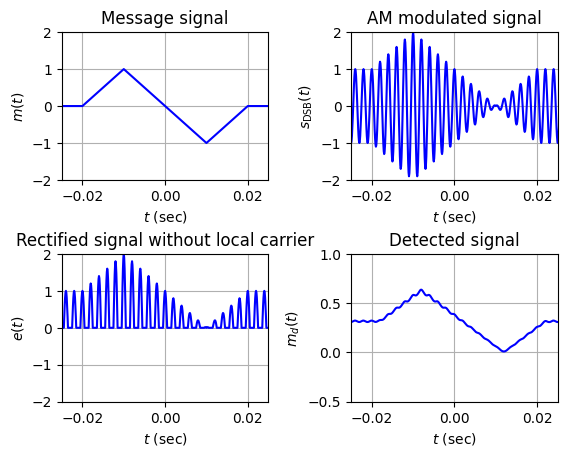

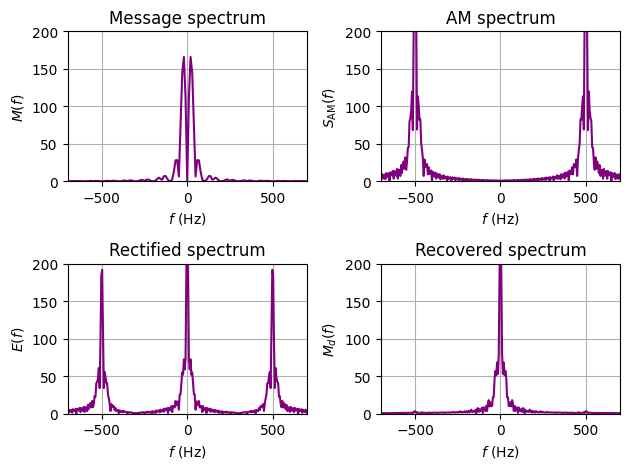

In [6]:
# Save this code as ExampleAMdemfilt.py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, filter_design as fd, lfilter
# This example illustrates conventional AL modulation and noncoherent
# demodulation for triangle signal whose bandwidth is theoretically unlimited
# First redefine the triangle signal:
def triangl(t):
    return (1-np.abs(t))*(t>=-1)*(t<1)
ts = 1e-4; t = np.arange(-0.04, 0.04+ts, ts)
Ta = 0.01;   fc = 500   # carrier frequency
m_sig = triangl((t+0.01)/0.01) - triangl((t-0.01)/0.01)   # generating m(t)
Lm_sig = len(m_sig); Lfft = len(t)
Lfft = int(2**np.ceil(np.log2(Lfft)))
M_fre = np.fft.fftshift(np.fft.fft(m_sig, Lfft))
freqm = np.arange(-Lfft/2, Lfft/2) / (Lfft*ts)

B_m = 150  # Bandwidth of the signal is B_m Hz.
h = firwin(40, [B_m*ts], window = "hamming", pass_zero = 'lowpass')

# AM signal generated by adding a carrier component to DSB-SC
s_am = (1 + m_sig) * np.cos(2*np.pi*fc*t); Lfft = len(t)
Lfft = int(2**np.ceil(np.log2(Lfft)+1))
S_am = np.fft.fftshift(np.fft.fft(s_am, Lfft))  # frequency domain
freqs = np.arange(-Lfft/2, Lfft/2) / (Lfft*ts)

# Demodulation begins by using a rectifier
s_dem = s_am * (s_am > 0)
S_dem = np.fft.fftshift(np.fft.fft(s_dem, Lfft))  # frequency domain
# Using an ideal LPF with bandwidth 150 Hz to recover the message m(t)
s_rec = lfilter(h, 1, s_dem)
S_rec = np.fft.fftshift(np.fft.fft(s_rec, Lfft))  # frequency domain

Trange = [-0.025, 0.025, -2, 2];  Frange=[-700, 700, 0, 200]
fig1 = plt.figure();   fig1.subplots_adjust(hspace=0.5,wspace=0.4)
plt.subplot(221);  plt.axis(Trange)
td1 = plt.plot(t, m_sig, 'blue', linewidth=1.5); plt.grid()
plt.xlabel(r'${\it t}$ (sec)')
plt.ylabel(r'${\it m}({\it t})$')
plt.title('Message signal')

plt.subplot(222); plt.axis(Trange)
td2 = plt.plot(t, s_am, 'blue', linewidth=1.5); plt.grid()
plt.xlabel(r'${\it t}$ (sec)')
plt.ylabel(r'${\it s}_{\rm DSB}({\it t})$')
plt.title('AM modulated signal')

plt.subplot(223); plt.axis(Trange)
td3 = plt.plot(t, s_dem, 'blue', linewidth=1.5); plt.grid()
plt.xlabel(r'${\it t}$ (sec)')
plt.ylabel(r'${\it e}({\it t})$')
plt.title('Rectified signal without local carrier')

plt.subplot(224);  Trangelow = [-0.025, 0.025, -0.5, 1]; plt.axis(Trangelow)
plt.plot(t, s_rec, 'blue', linewidth=1.5); plt.grid()
plt.xlabel(r'${\it t}$ (sec)')
plt.ylabel(r'${\it m}_d({\it t})$')
plt.title('Detected signal')
plt.show()

plt.figure()
plt.subplot(221); plt.axis(Frange)
fd1 = plt.plot(freqm, abs(M_fre), 'purple', linewidth=1.5); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)'); plt.ylabel(r'${M}({f})$')
plt.title('Message spectrum')

plt.subplot(222); plt.axis(Frange)
fd2 = plt.plot(freqs, abs(S_am), 'purple', linewidth=1.5); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)'); plt.ylabel(r'${S}_{\rm AM}({f})$')
plt.title('AM spectrum')

plt.subplot(223); plt.axis(Frange)
plt.plot(freqs, np.abs(S_dem), 'purple', linewidth=1.5); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)'); plt.ylabel(r'${E}({\it f})$')
plt.title('Rectified spectrum')

plt.subplot(224); plt.axis(Frange)
plt.plot(freqs, np.abs(S_rec), 'purple', linewidth=1.5); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)'); plt.ylabel(r'${M}_d({\it f})$')
plt.title('Recovered spectrum')
plt.tight_layout()
plt.show()


<img src="images/Fig4_44.png" width="600" />
<center><b>Figure 4.44</b> Time domain signals in AM modulation and noncoherent demodulation.</center>

<img src="images/Fig4_45.png" width="600" />
<center><b>Figure 4.45</b> Frequency domain signals in AM modulation and noncoherent demodulation.</center>

# 4.12.3 SSB-SC Modulation and Demodulation
<span style="color:red"> <b>*Note: See Textbook*</b></span>

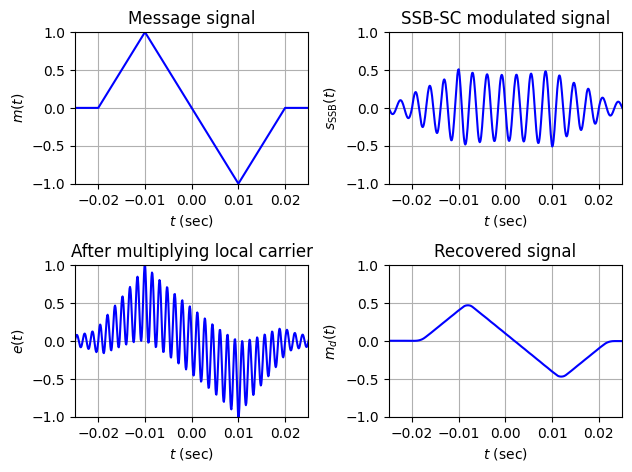

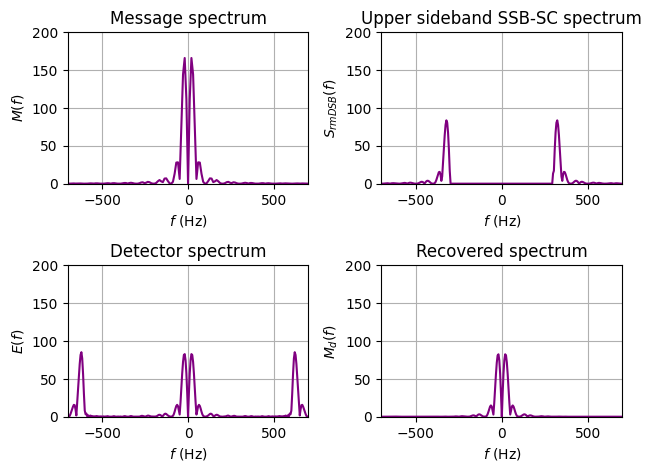

In [7]:
# Save this code as ExampleSSBdemfilt.py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, filter_design as fd, lfilter
# This example uses triangl to illustrate SSB modulation and demodulation
# for triangle signal whose bandwidth is theoretically unlimited
# First redefine the triangle signal:
def triangl(t):
    return (1-np.abs(t))*(t>=-1)*(t<1)

ts = 1e-4; t = np.arange(-0.04, 0.04 + ts, ts)
Ta = 0.01;   fc = 300   # carrier frequency
m_sig = triangl((t+0.01)/0.01)-triangl((t-0.01)/0.01)
Lm_sig = len(m_sig); Lfft = len(t)
Lfft = int(2 ** np.ceil(np.log2(Lfft)))
M_fre = np.fft.fftshift(np.fft.fft(m_sig, Lfft))
freqm = np.arange(-Lfft/2, Lfft/2)*(1/(Lfft*ts))
B_m = 150  # Bandwidth of the signal is B_m Hz.
h = firwin(40,[B_m*ts],window='hamming',pass_zero='lowpass') #filter

s_dsb = m_sig * np.cos(2 * np.pi * fc * t); Lfft = len(t)
Lfft = int(2 ** (np.ceil(np.log2(Lfft) + 1)))
L_lsb = np.floor(fc * ts * Lfft)
SSBfilt = np.ones(Lfft)
SSBfilt[int(Lfft/2 - L_lsb):int(Lfft/2 + L_lsb)] = 0
S_ssb = np.fft.fftshift(np.fft.fft(s_dsb, Lfft)) * SSBfilt
freqs = np.arange(-Lfft/2, Lfft/2)*(1/(Lfft*ts))
s_ssb = np.real(np.fft.ifft(np.fft.ifftshift(S_ssb)))
s_ssb = s_ssb[:Lm_sig]

# Demodulation begins by multiplying with the carrier
s_dem = s_ssb * np.cos(2 * np.pi * fc * t) * 2
S_dem = np.fft.fftshift(np.fft.fft(s_dem, Lfft))
# Using an ideal LPF with bandwidth 150 Hz
s_rec = lfilter(h, 1, s_dem)
S_rec = np.fft.fftshift(np.fft.fft(s_rec, Lfft))

Trange = [-0.025, 0.025, -1, 1]; Frange=[-700, 700, 0, 200]
fig1 = plt.figure(); fig1.subplots_adjust(hspace=0.5,wspace=0.4)

plt.subplot(221); plt.axis(Trange)
td1 = plt.plot(t, m_sig, 'b', linewidth=1.5); plt.grid()
plt.xlabel(r'${\it t}$ (sec)'); plt.ylabel(r'${\it m}({\it t})$');
plt.title('Message signal')

plt.subplot(222); plt.axis(Trange)
td2 = plt.plot(t, s_ssb, 'b', linewidth=1.5); plt.grid()
plt.xlabel(r'${\it t}$ (sec)'); plt.ylabel(r'${s}_{\rm SSB}({t})$')
plt.title('SSB-SC modulated signal')

plt.subplot(223); plt.axis(Trange)
td3 = plt.plot(t, s_dem, 'b', linewidth=1.5); plt.grid()
plt.xlabel(r'${\it t}$ (sec)'); plt.ylabel(r'${\it e}({\it t})$')
plt.title('After multiplying local carrier')

plt.subplot(224); plt.axis(Trange)
td4, = plt.plot(t, s_rec, 'b', linewidth=1.5); plt.grid()
plt.xlabel(r'${\it t}$ (sec)'); plt.ylabel(r'${\it m}_d({\it t})$')
plt.title('Recovered signal')

plt.tight_layout(pad=1.0) # Set the spacing between subfigures
plt.show()

fig2 = plt.figure()
fig2.subplots_adjust(hspace=0.5,wspace=0.4)

plt.subplot(221);plt.axis(Frange)
fd1 = plt.plot(freqm, np.abs(M_fre),'purple',linewidth=1.5); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)')
plt.ylabel(r'${\it M}({\it f})$')
plt.title('Message spectrum')

plt.subplot(222);plt.axis(Frange)
fd2 = plt.plot(freqs, np.abs(S_ssb),'purple',linewidth=1.5); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)');
plt.ylabel(r'${\it S}_{rm DSB}({\it f})$')
plt.title('Upper sideband SSB-SC spectrum')

plt.subplot(223); plt.axis(Frange)
fd3 = plt.plot(freqs, np.abs(S_dem),'purple',linewidth=1.5); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)')
plt.ylabel(r'${\it E}({\it f})$');
plt.title('Detector spectrum');

plt.subplot(224); plt.axis(Frange)
fd4 = plt.plot(freqs,abs(S_rec),'purple',linewidth=1.5); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)')
plt.ylabel(r'${\it M}_d({\it f})$')
plt.title('Recovered spectrum');

plt.tight_layout(pad=1.0)  # Set the spacing between subfigures
plt.show()

<img src="images/Fig4_46.png" width="600" />

<center><b>Figure 4.46</b> Time domain signals during SSB-SC modula-tion and coherent demodulation. </center>

<img src="images/Fig4_47.png" width="600" />

<center><b>Figure 4.47</b> Frequency domain signals in SSB-SC modulation and coherent demodulation. </center>

# 4.12.4 QAM Modulation and Demodulation
<span style="color:red"> <b>*Note: See Textbook*</b></span>

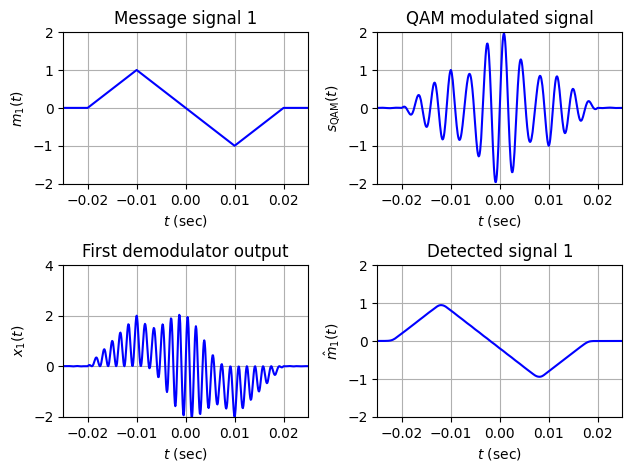

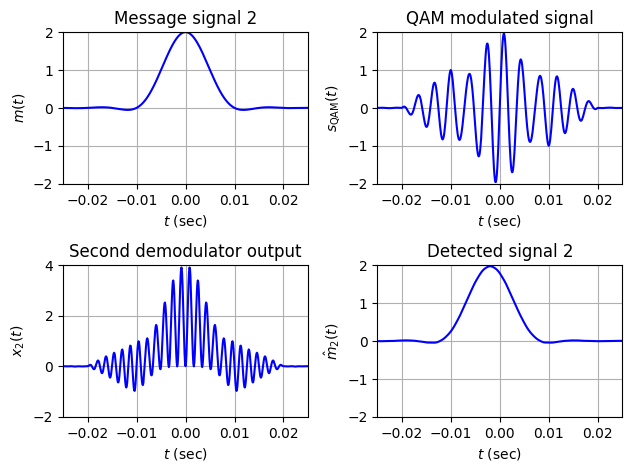

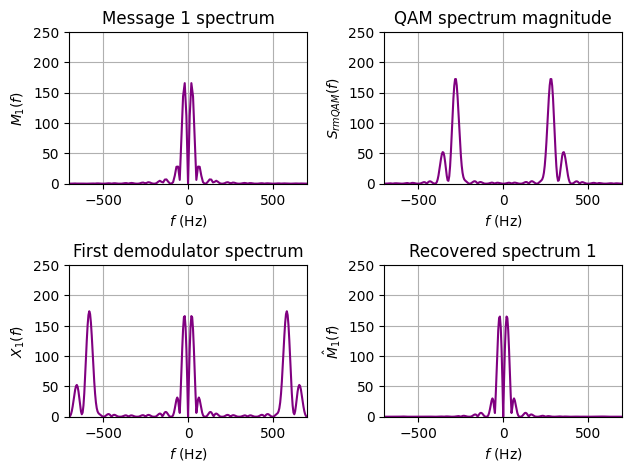

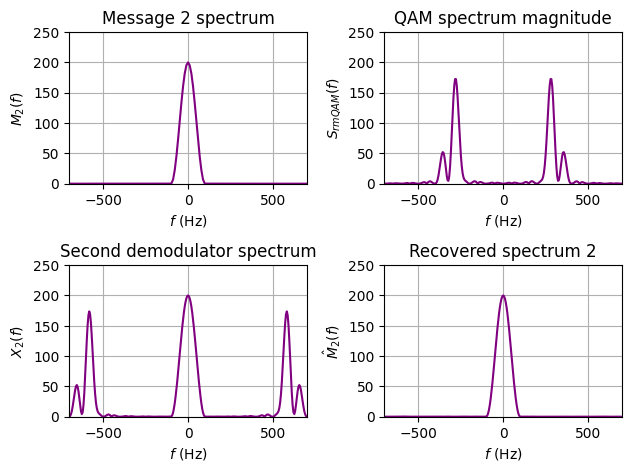

In [8]:
# Save this code as ExampleQAMdemfilt.py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, filter_design as fd, lfilter
# This example uses triangl triplesinc to illustrate QAM modulation
# and  demodulation of two message signals
# First define the two message signals:
def triangl(t):
    return (1-np.abs(t))*(t>=-1)*(t<1)
def triplesinc(t, Ta):
    # t is the length of the signal
    # Ta is the parameter, equaling twice the delay
    sig_1 = np.sinc(2 * t / Ta);  sig_2 = np.sinc(2 * t / Ta - 1)
    sig_3 = np.sinc(2 * t / Ta + 1)
    m = 2 * sig_1 + sig_2 + sig_3
    return m

ts=1.e-4; t=-np.arange(-0.04, 0.04 + ts, ts)#0.04:ts:0.04
Ta=0.01; fc=300    # carrier frequency of QAM

# Use triangl.m and triplesinc.m to generate
# two message signals of different shapes and spectra
m_sig1=triangl((t+0.01)/0.01)-triangl((t-0.01)/0.01)
m_sig2=triplesinc(t,Ta)

Lm_sig = len(m_sig1)
Lfft = len(t); Lfft = int(2** np.ceil(np.log2(Lfft)))

M1_fre = np.fft.fftshift(np.fft.fft(m_sig1,Lfft))
M2_fre = np.fft.fftshift(np.fft.fft(m_sig2,Lfft))
freqm = np.arange(-Lfft/2, Lfft/2) / (Lfft * ts)

B_m=150     #Bandwidth of the signal is B_m Hz.
# Design a simple lowpass filter with bandwidth B_m Hz.
h = firwin(40,[B_m*ts],window='hamming',pass_zero='lowpass')

# QAM signal generated by adding a carrier to DSB-SC
s_qam = m_sig1 *np.cos(2*np.pi*fc*t) + m_sig2 * np.sin(2*np.pi*fc*t)

Lfft = len(t); Lfft = int(2**np.ceil(np.log2(Lfft)+1))
S_qam = np.fft.fftshift(np.fft.fft(s_qam,Lfft))
freqs = np.arange(-Lfft/2, Lfft/2) / (Lfft * ts)

# Demodulation begins by using a rectifier
s_dem1 = s_qam * np.cos(2 * np.pi * fc * t) * 2
S_dem1 = np.fft.fftshift(np.fft.fft(s_dem1,Lfft))
# Demodulate the 2nd signal
s_dem2 = s_qam * np.sin(2 * np.pi * fc * t)*2
S_dem2 = np.fft.fftshift(np.fft.fft(s_dem2,Lfft))
# Using an ideal LPF with bandwidth 150 Hz
s_rec1 = lfilter(h,1,s_dem1)
S_rec1 = np.fft.fftshift(np.fft.fft(s_rec1,Lfft))
s_rec2 = lfilter(h,1,s_dem2)
S_rec2 = np.fft.fftshift(np.fft.fft(s_rec2,Lfft))

Trange=[-0.025, 0.025, -2, 2]; Trange2=[-0.025, 0.025, -2, 4]
fig1 = plt.figure(); fig1.subplots_adjust(hspace=0.5,wspace=0.4)

plt.subplot(221); plt.axis(Trange)
td1 = plt.plot(t,m_sig1,'b'); plt.grid()
plt.xlabel(r'${t}$ (sec)'); plt.ylabel(r'${ m}_1({\it t})$')
plt.title('Message signal 1')

plt.subplot(222); plt.axis(Trange)
td2 = plt.plot(t,s_qam,'b'); plt.grid()
plt.xlabel(r'${t}$ (sec)'); plt.ylabel(r'${s}_{\rm QAM}(t)$')
plt.title('QAM modulated signal')

plt.subplot(223); plt.axis(Trange2)
td3 = plt.plot(t,s_dem1,'b'); plt.grid()
plt.xlabel(r'${t}$ (sec)'); plt.ylabel(r'${ x}_1({ t})$')
plt.title('First demodulator output')

plt.subplot(224); plt.axis(Trange)
td4 = plt.plot(t,s_rec1,'b'); plt.grid()
plt.xlabel(r'${t}$ (sec)'); plt.ylabel(r'${\hat m}_{1}(t)$')
plt.title('Detected signal 1')

plt.tight_layout(pad=1.0) # Set the spacing between subfigures
plt.show()

fig2 = plt.figure()
fig2.subplots_adjust(hspace=0.5,wspace=0.4)

plt.subplot(221); plt.axis(Trange)
td5 = plt.plot(t,m_sig2,'b'); plt.grid()
plt.xlabel(r'${\it t}$ (sec)');  plt.ylabel(r'${\it m}({\it t})$')
plt.title('Message signal 2')

plt.subplot(222); plt.axis(Trange)
td6 = plt.plot(t,s_qam,'b'); plt.grid()
plt.xlabel(r'${\it t}$ (sec)'); plt.ylabel(r'${s}_{\rm QAM}({t})$')
plt.title('QAM modulated signal')

plt.subplot(223); plt.axis(Trange2)
td7 = plt.plot(t,s_dem2,'b'); plt.grid()
plt.xlabel(r'${\it t}$ (sec)'); plt.ylabel(r'$x_2({\it t})$')
plt.title('Second demodulator output')

plt.subplot(224); plt.axis(Trange)
td8 = plt.plot(t,s_rec2,'b'); plt.grid()
plt.xlabel(r'${\it t}$ (sec)'); plt.ylabel(r'${\hat m}_{2}({\it t})$')
plt.title('Detected signal 2')

plt.tight_layout(pad=1.0)  # Set the spacing between subfigures
plt.show()


Frange=[-700, 700, 0, 250]
fig3 = plt.figure()
fig3.subplots_adjust(hspace=0.5,wspace=0.4)

plt.subplot(221); plt.axis(Frange)
fd1 = plt.plot(freqm,np.abs(M1_fre), 'purple'); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)'); plt.ylabel(r'$M_1({f})$')
plt.title('Message 1 spectrum')

plt.subplot(222); plt.axis(Frange)
fd2 = plt.plot(freqs,np.abs(S_qam), 'purple'); plt.grid()
plt.axis(Frange)
plt.xlabel(r'${\it f}$ (Hz)'); plt.ylabel(r'${S}_{rm QAM}({f})$')
plt.title('QAM spectrum magnitude')

plt.subplot(223); plt.axis(Frange)
fd3 = plt.plot(freqs,np.abs(S_dem1), 'purple'); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)'); plt.ylabel(r'${X}_1({f})$')
plt.title('First demodulator spectrum')

plt.subplot(224); plt.axis(Frange)
fd4 = plt.plot(freqs,np.abs(S_rec1), 'purple'); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)'); plt.ylabel(r'${\hat M}_{1}({f})$')
plt.title('Recovered spectrum 1')

plt.tight_layout(pad=1.0) # Set the spacing between subfigures
plt.show()

fig4 = plt.figure()
fig4.subplots_adjust(hspace=0.5,wspace=0.4)

plt.subplot(221); plt.axis(Frange)
fd1 = plt.plot(freqm,np.abs(M2_fre),'purple'); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)'); plt.ylabel(r'${M}_2({\it f})$')
plt.title('Message 2 spectrum')

plt.subplot(222); plt.axis(Frange)
fd2 = plt.plot(freqs,np.abs(S_qam),'purple'); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)'); plt.ylabel(r'${S}_{rm QAM}({f})$')
plt.title('QAM spectrum magnitude')

plt.subplot(223); plt.axis(Frange)
fd7 = plt.plot(freqs,np.abs(S_dem2),'purple'); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)'); plt.ylabel(r'${X}_2({f})$')
plt.title('Second demodulator spectrum')

plt.subplot(224); plt.axis(Frange)
fd8 = plt.plot(freqs,np.abs(S_rec2),'purple'); plt.grid()
plt.xlabel(r'${\it f}$ (Hz)'); plt.ylabel(r'${\hat M}_{2}({f})$')
plt.title('Recovered spectrum 2')

plt.tight_layout(pad=1.0)# Set the spacing between subfigure
plt.show()


<img src="images/Fig4_48.png" width="600" />

<center><b>Figure 4.48</b> Time domain signals during QAM modulation and coherent demodulation for the first message $m_1(t)$. </center>

<img src="images/Fig4_49.png" width="600" />

<center><b>Figure 4.49</b> Frequency domain signals during QAM modulation and coherent demodulation for the first message $m_1(t)$. </center>

<img src="images/Fig4_50.png" width="600" />

<center><b>Figure 4.50</b> Time domain signals during QAM modulation and coherent demodulation for the second message $m_2(t)$. </center>

<img src="images/Fig4_51.png" width="600" />

<center><b>Figure 4.51</b> Frequency domain signals during QAM modulation and coherent demodulation for the second message $m_2(t)$. </center>

# 4.12.5 FM Modulation and Demodulation
<span style="color:red"> <b>*Note: See Textbook*</b></span>

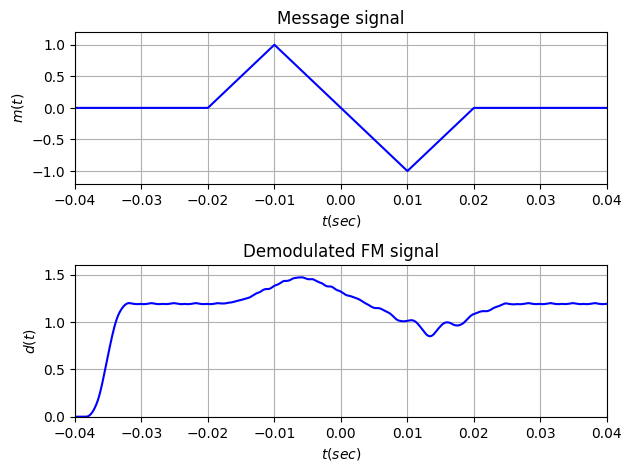

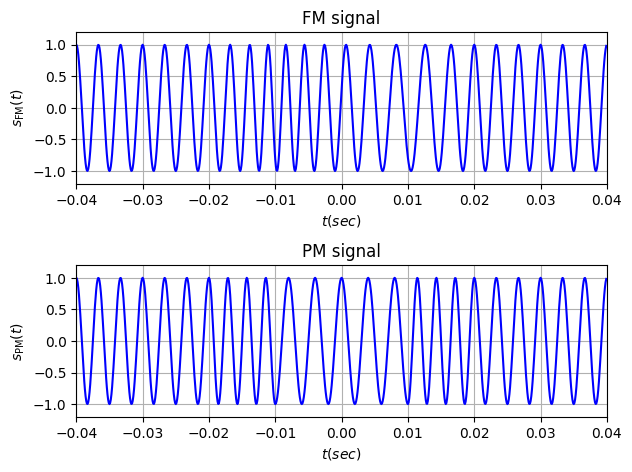

<Figure size 640x480 with 0 Axes>

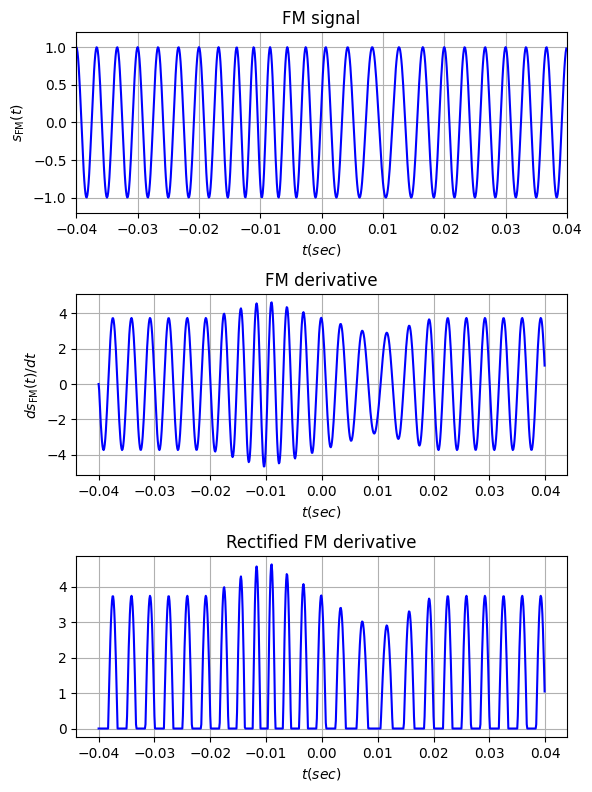

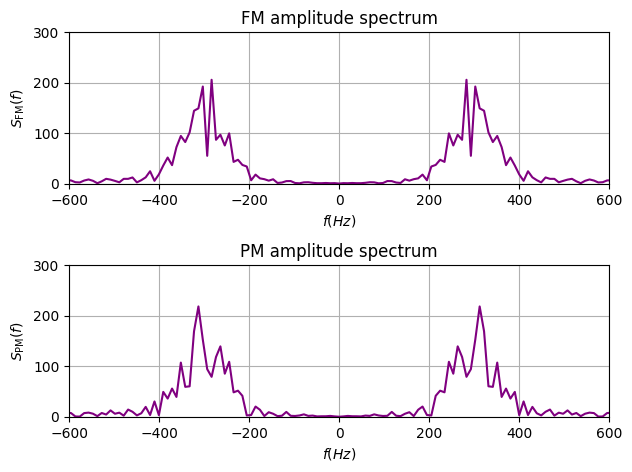

In [9]:
# Save this code as ExampleFM.py
# This program uses triangl to illustrate FM/PM modulation/demodulation
def triangl(t):
    return (1-np.abs(t))*(t>=-1)*(t<1)
ts = 1e-4;  t = np.arange(-0.04, 0.04, ts)
Ta = 0.01
m_sig = triangl((t+0.01)/Ta)-triangl((t-0.01)/Ta)
Lfft = len(t);  Lfft = int(2**np.ceil(np.log2(Lfft)))
M_fre = np.fft.fftshift(np.fft.fft(m_sig, Lfft))
freqm = np.arange(-Lfft/2, Lfft/2, 1) / (Lfft * ts)

B_m = 100 # Design a simple lowpass filter with bandwidth B_m Hz.
h = firwin(80,[B_m*ts],window='hamming',pass_zero='lowpass')

kf = 160 * np.pi   # FM coefficient
m_intg = kf * ts * np.cumsum(m_sig)
s_fm = np.cos(2 * np.pi * 300 * t + m_intg)
s_pm = np.cos(2 * np.pi * 300 * t + np.pi * m_sig)
Lfft = len(t);  Lfft = int(2**np.ceil(np.log2(Lfft + 1)))
S_fm = np.fft.fftshift(np.fft.fft(s_fm, Lfft))
S_pm = np.fft.fftshift(np.fft.fft(s_pm, Lfft))
freqs = np.arange(-Lfft/2, Lfft/2, 1) / (Lfft * ts)

s_fmdem = np.diff(np.concatenate(([s_fm[0]], s_fm)))/ts /kf #taking derivative
s_fmrec = s_fmdem * (s_fmdem > 0)     #applying rectifier
s_dec = lfilter(h, 1, s_fmrec)        #lowpass filtering

Trange1 = [-0.04, 0.04, -1.2, 1.2]; Trange2 = [-0.04, 0.04, 0, 1.6]

fig1 = plt.figure()
fig1.subplots_adjust(hspace=0.5,wspace=0.4)

plt.subplot(211); plt.axis(Trange1); plt.grid()
m1 = plt.plot(t,m_sig,'b')
plt.xlabel(r'${ t} (sec)$'); plt.ylabel(r'${ m}({ t})$')
plt.title('Message signal')

plt.subplot(212); plt.axis(Trange2); plt.grid()
m2 = plt.plot(t,s_dec,'b')
plt.xlabel(r'${ t} (sec)$'); plt.ylabel(r'$d(t)$')
plt.title('Demodulated FM signal')

plt.tight_layout(pad=1.0)  # Set the spacing between subfigures
plt.show()

fig2 = plt.figure()
fig2.subplots_adjust(hspace=0.5,wspace=0.4)

plt.subplot(211); plt.axis(Trange1); plt.grid()
td1 = plt.plot(t,s_fm,'b')
plt.xlabel(r'${ t} (sec)$'); plt.ylabel(r'${s}_{\rm FM}({t})$')
plt.title('FM signal')
plt.subplot(212); plt.axis(Trange1); plt.grid()
td2 = plt.plot(t,s_pm,'b')
plt.xlabel(r'${ t} (sec)$'); plt.ylabel(r'${s}_{\rm PM}({t})$')
plt.title('PM signal')

plt.tight_layout(pad=1.0)  # Set the spacing between subfigures
plt.show()

fig3 = plt.figure()
fig3.subplots_adjust(hspace=0.5,wspace=0.8)

plt.figure(figsize=(6.,8))
plt.subplot(311); plt.axis(Trange1); plt.grid()
td1 = plt.plot(t,s_fm,'b')
plt.xlabel(r'${ t} (sec)$'); plt.ylabel(r'${s}_{\rm FM}({t})$')
plt.title('FM signal')
plt.subplot(312)
fp1 = plt.plot(t,s_fmdem,'b'); plt.grid()
plt.xlabel(r'${\it t} (sec)$'); plt.ylabel(r'${d s}_{\rm FM}({t})/dt$')
plt.title('FM derivative')
plt.subplot(313)
fp2 = plt.plot(t,s_fmrec,'b'); plt.grid()
plt.xlabel(r'${\it t} (sec)$')
plt.title('Rectified FM derivative')

plt.tight_layout(pad=1.0)  # Set the spacing between subfigures
plt.show()

Frange=[-600, 600, 0, 300]
fig4 = plt.figure()
fig4.subplots_adjust(hspace=0.5,wspace=0.4)

plt.subplot(211); plt.axis(Frange)
fd1 = plt.plot(freqs,np.abs(S_fm),'purple'); plt.grid()
plt.xlabel(r'${\it f} (Hz)$'); plt.ylabel(r'${S}_{\rm FM}({f})$')
plt.title('FM amplitude spectrum')
plt.subplot(212);  plt.axis(Frange)
fd2 = plt.plot(freqs,np.abs(S_pm),'purple'); plt.grid()
plt.xlabel(r'${\it f} (Hz)$'); plt.ylabel(r'${S}_{\rm PM}({f})$')
plt.title('PM amplitude spectrum')

plt.tight_layout(pad=1.0) # Set the spacing between subfigures
plt.show()

<img src="images/Fig4_52.png" width="600" />

<center><b>Figure 4.52</b> Signals at the demodulator: (a) after differentiator; (b) after rectifier.</center>

<img src="images/Fig4_53.png" width="600" />

<center><b>Figure 4.53</b> FM modulation and demodulation: (a) original message; (b) recovered signal. </center>
